In [1]:
%pip install pdfplumber

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pdfplumber

pdf_path = r"C:\Users\Muthu\Downloads\Paytm_UPI_Statement_06_May'23_-_07_May'25.pdf"  # Replace with the actual path for your system

with pdfplumber.open(pdf_path) as pdf:
    for page in pdf.pages:
        text = page.extract_text()
        print(text) # Or do something else with the extracted text

CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


Pragadeesh S
8903558066, null
UPI Statement for Total Money Paid Total Money Received
6 MAY'23 - 7 MAY'25 - Rs.6,393.71 + Rs.4,033.65
24 Payments made 19 Payments received
Note:
Self transfer payments are not included in the total money paid and money received calculations
Payments that you might have hidden on payment history page will not be included in this statement
Accounts Payment made Payment received
Rs.6,393.71 Rs.3,972.65
Indian Overseas Bank - 0423
(24 Payments) (18 Payments)
Rs.0 Rs.61
INDIAN OVERSEAS BANK - 0423
(0 Payment) (1 Payment)
Passbook Payments History
All UPI payments done by you on Paytm App are reflected in this statement
Date &
Transaction Details Your Account Amount
Time
01 Apr Paid to Reliance Retail Ltd Indian - Rs.19
9:59 AM UPI Ref No: 509103880652 Overseas
Tag: # Bill Payments Bank - 0423
16 Feb Paid to Amazon Pay Balance Indian - Rs.10
2:31 PM UPI Ref No: 504780474674 Overseas
Note: You are paying for an Amazon order
Bank - 0423
07 Feb Paytm Merchant In

CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


Date &
Transaction Details Your Account Amount
Time
14 Jul Received from Sumathy S Indian + Rs.50
4:55 PM UPI Ref No: 456220949843 Overseas
Bank - 0423
07 Jul Money sent to Sumathy S Indian - Rs.150
1:10 PM UPI Ref No: 455518968119 Overseas
Bank - 0423
07 Jul Received from Sumathy S Indian + Rs.200
11:43 AM UPI Ref No: 418915904394 Overseas
Bank - 0423
17 Jun Paid to Government College of Technology Indian - Rs.600
9:55 AM UPI Ref No: 416909182622 Overseas
Note: UPI Collect request for 356744781
Bank - 0423
18 May Received from Sumathy S Indian + Rs.500
1:16 PM UPI Ref No: 450510194547 Overseas
Bank - 0423
02 May Money sent to Sumathy S Indian - Rs.1
12:12 PM UPI Ref No: 448919364736 Overseas
Bank - 0423
02 May Money sent to Jancy Indian - Rs.500
10:29 AM UPI Ref No: 412315394365 Overseas
Bank - 0423
02 May Received from Jancy . Indian + Rs.500
10:20 AM UPI Ref No: 412303708600 Overseas
Bank - 0423
07 Apr Paid to Guvi Geek Network Private Limited Indian - Rs.1,999
7:06 PM UPI Ref No: 4

In [5]:
pip install "numpy<2.0"


Note: you may need to restart the kernel to use updated packages.


In [7]:
import pdfplumber
import pandas as pd

def extract_transactions_from_pdf(pdf_path):
    transactions = []

    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text = page.extract_text()
            if text:
                lines = text.split('\n')
                for line in lines:
                    if any(keyword in line for keyword in ["Paid to", "Received from", "Money sent to", "Paytm Merchant"]):
                        transactions.append(line.strip())

    return transactions

if __name__ == "__main__":
    pdf_file = r"C:\Users\Muthu\Downloads\Paytm_UPI_Statement_06_May'23_-_07_May'25.pdf" # Put your actual filename here
    extracted = extract_transactions_from_pdf(pdf_file)

    # Save or print result
    for i, line in enumerate(extracted[:20], 1):  # Print first 20 lines
        print(f"{i}: {line}")

CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


1: 01 Apr Paid to Reliance Retail Ltd Indian - Rs.19
2: 16 Feb Paid to Amazon Pay Balance Indian - Rs.10
3: 07 Feb Paytm Merchant Indian - Rs.21
4: 06 Feb Paid to Paytm Gold Indian - Rs.25
5: 05 Feb Received from One Ninety Seven Indian + Rs.2
6: 05 Feb Money sent to Pragadeesh Srinivasan Indian - Rs.30
7: 05 Feb Money sent to Pragadeesh Srinivasan Indian - Rs.3
8: 05 Feb Received from One Ninety Seven Indian + Rs.3
9: 05 Feb Paid to Tictok Skill Games Pvt Ltd Indian - Rs.10
10: 04 Feb Money sent to Pragadeesh Srinivasan Indian - Rs.5
11: 04 Feb Received from One Ninety Seven Indian + Rs.2
12: 04 Feb Money sent to Pragadeesh Srinivasan Indian - Rs.270
13: 04 Feb Money sent to Pragadeesh Srinivasan Indian - Rs.250
14: 06 Jan Received from Sumathy S INDIAN + Rs.61
15: 14 Nov Money sent to Sumathy S Indian - Rs.800
16: 14 Nov Received from Cynthia Monica V Indian + Rs.800
17: 14 Nov Received from Cynthia Monica V Indian + Rs.1
18: 10 Nov Money sent to Cynthia Monica V Indian - Rs.800
19: 

In [9]:
import pdfplumber
import pandas as pd
import re

def extract_structured_transactions(pdf_path):
    transactions = []
    current = {}

    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text = page.extract_text()
            if not text:
                continue

            lines = text.split('\n')
            for i, line in enumerate(lines):
                # 1. Detect transaction start line (starts with date)
                if re.match(r'\d{2} \w{3} ', line):
                    if current:
                        transactions.append(current)
                        current = {}

                    # Extract date and transaction description + amount
                    match = re.match(r"(\d{2} \w{3}) (.+) Indian ([+-]) Rs\.?([\d,]+(?:\.\d{1,2})?)", line)
                    if match:
                        current["Date"] = match.group(1)
                        current["Type_Desc"] = match.group(2).strip()
                        current["Direction"] = "Credit" if match.group(3) == '+' else "Debit"
                        current["Amount"] = float(match.group(4).replace(",", ""))
                
                elif "UPI Ref No" in line:
                    current["UPI Ref No"] = line.split(":")[-1].strip()
                
                elif re.search(r"\d{1,2}:\d{2} (AM|PM)", line):
                    time_match = re.search(r"\d{1,2}:\d{2} (AM|PM)", line)
                    if time_match:
                        current["Time"] = time_match.group()

                elif "Bank - " in line:
                    bank_match = re.search(r"Bank - (\d+)", line)
                    if bank_match:
                        current["Bank"] = bank_match.group(1)

                elif "Note:" in line or "Tag:" in line:
                    current["Note"] = line.replace("Note:", "").replace("Tag:", "").strip()

        # Append last one
        if current:
            transactions.append(current)

    return pd.DataFrame(transactions)

if __name__ == "__main__":
    pdf_file = r"C:\Users\Muthu\Downloads\Paytm_UPI_Statement_06_May'23_-_07_May'25.pdf"

    df = extract_structured_transactions(pdf_file)
    
    # Save to CSV
    df.to_csv("downloads/structured_upi_data.csv", index=False)
    
    # Print preview
    print(df.head(10))

CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


                                 Note  Bank    Date  \
0                                      0423     NaN   
1                                 NaN  0423  01 Apr   
2  You are paying for an Amazon order  0423  16 Feb   
3                                 NaN  0423  07 Feb   
4                                 NaN  0423  06 Feb   
5                                 NaN  0423  05 Feb   
6                                 NaN  0423  05 Feb   
7                                 NaN  0423  05 Feb   
8                                 NaN  0423  05 Feb   
9                          UPI Intent  0423  05 Feb   

                             Type_Desc Direction  Amount  \
0                                  NaN       NaN     NaN   
1          Paid to Reliance Retail Ltd     Debit    19.0   
2           Paid to Amazon Pay Balance     Debit    10.0   
3                       Paytm Merchant     Debit    21.0   
4                   Paid to Paytm Gold     Debit    25.0   
5       Received from One Ninety S

In [11]:
# Load your CSV
df = pd.read_csv("downloads/structured_upi_data.csv")

# Drop row with all NaN except Bank (first row)
df = df.dropna(how='all', subset=['Date', 'Type_Desc', 'Amount'])

# Forward fill Note column to preserve context comments
df['Note'] = df['Note'].fillna(method='ffill')

# Fix UPI Ref No: remove "Overseas" and strip whitespace
df['UPI Ref No'] = df['UPI Ref No'].astype(str).str.replace('Overseas', '', regex=False).str.strip()

# Parse 'Date' assuming year 2024 (or use actual year if you have it)
df['Date'] = pd.to_datetime(df['Date'] + " 2024", errors='coerce', format="%d %b %Y")

# Fix Amount type
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Drop unused Time column if mostly empty
df.drop(columns=['Time'], inplace=True)

# Rename Bank column to fix if needed
df.rename(columns={'Bank': 'Bank_Code'}, inplace=True)

# Reset index
df = df.reset_index(drop=True)

# Show cleaned head
print(df.head(10))

                                 Note  Bank_Code       Date  \
0                                 NaN      423.0 2024-04-01   
1  You are paying for an Amazon order      423.0 2024-02-16   
2  You are paying for an Amazon order      423.0 2024-02-07   
3  You are paying for an Amazon order      423.0 2024-02-06   
4  You are paying for an Amazon order      423.0 2024-02-05   
5  You are paying for an Amazon order      423.0 2024-02-05   
6  You are paying for an Amazon order      423.0 2024-02-05   
7  You are paying for an Amazon order      423.0 2024-02-05   
8                          UPI Intent      423.0 2024-02-05   
9                          UPI Intent      423.0 2024-02-04   

                             Type_Desc Direction  Amount    UPI Ref No  
0          Paid to Reliance Retail Ltd     Debit    19.0  509103880652  
1           Paid to Amazon Pay Balance     Debit    10.0  504780474674  
2                       Paytm Merchant     Debit    21.0  503866948132  
3             

C:\Users\Muthu\AppData\Local\Temp\ipykernel_13996\3041532252.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Note'] = df['Note'].fillna(method='ffill')


In [13]:
df

,Note,Bank_Code,Date,Type_Desc,Direction,Amount,UPI Ref No
0,NaN,423.0,2024-04-01,Paid to Reliance Retail Ltd,Debit,19.00,509103880652
1,You are paying for an Amazon order,423.0,2024-02-16,Paid to Amazon Pay Balance,Debit,10.00,504780474674
2,You are paying for an Amazon order,423.0,2024-02-07,Paytm Merchant,Debit,21.00,503866948132
3,You are paying for an Amazon order,423.0,2024-02-06,Paid to Paytm Gold,Debit,25.00,503751969793
4,You are paying for an Amazon order,423.0,2024-02-05,Received from One Ninety Seven,Credit,2.00,503640376381
5,You are paying for an Amazon order,423.0,2024-02-05,Money sent to Pragadeesh Srinivasan,Debit,30.00,503646462616
6,You are paying for an Amazon order,423.0,2024-02-05,Money sent to Pragadeesh Srinivasan,Debit,3.00,503644804963
7,You are paying for an Amazon order,423.0,2024-02-05,Received from One Ninety Seven,Credit,3.00,503639565951
8,UPI Intent,423.0,2024-02-05,Paid to Tictok Skill Games Pvt Ltd,Debit,10.00,503641636453
9,UPI Intent,423.0,2024-02-04,Money sent to Pragadeesh Srinivasan,Debit,5.00,503532950113


In [15]:
# Clean column names
df.columns = df.columns.str.strip()

# Parse dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Clean Amount column
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Drop rows where Date is NaT or Amount is NaN
df = df.dropna(subset=['Date', 'Amount'])

# Fill missing values for 'Note' or 'Type_Desc' if needed
df['Type_Desc'] = df['Type_Desc'].fillna("Unknown")

In [17]:
#Basic Financial Summary
total_paid = df[df['Direction'] == 'Debit']['Amount'].sum()
total_received = df[df['Direction'] == 'Credit']['Amount'].sum()

print(f"Total Paid: ₹{total_paid}")
print(f"Total Received: ₹{total_received}")

Total Paid: ₹6393.71
Total Received: ₹3972.65


In [19]:
df

,Note,Bank_Code,Date,Type_Desc,Direction,Amount,UPI Ref No
0,NaN,423.0,2024-04-01,Paid to Reliance Retail Ltd,Debit,19.00,509103880652
1,You are paying for an Amazon order,423.0,2024-02-16,Paid to Amazon Pay Balance,Debit,10.00,504780474674
2,You are paying for an Amazon order,423.0,2024-02-07,Paytm Merchant,Debit,21.00,503866948132
3,You are paying for an Amazon order,423.0,2024-02-06,Paid to Paytm Gold,Debit,25.00,503751969793
4,You are paying for an Amazon order,423.0,2024-02-05,Received from One Ninety Seven,Credit,2.00,503640376381
5,You are paying for an Amazon order,423.0,2024-02-05,Money sent to Pragadeesh Srinivasan,Debit,30.00,503646462616
6,You are paying for an Amazon order,423.0,2024-02-05,Money sent to Pragadeesh Srinivasan,Debit,3.00,503644804963
7,You are paying for an Amazon order,423.0,2024-02-05,Received from One Ninety Seven,Credit,3.00,503639565951
8,UPI Intent,423.0,2024-02-05,Paid to Tictok Skill Games Pvt Ltd,Debit,10.00,503641636453
9,UPI Intent,423.0,2024-02-04,Money sent to Pragadeesh Srinivasan,Debit,5.00,503532950113


In [21]:
df.columns

Index(['Note', 'Bank_Code', 'Date', 'Type_Desc', 'Direction', 'Amount',
       'UPI Ref No'],
      dtype='object')

In [23]:
# Manual merchant-to-category mapping
merchant_to_category = {
    "Reliance Retail Ltd": "Retail",
    "Amazon Pay": "E-commerce / Retail",
    "One Ninety Seven": "Payments / Other",
    "Paytm Gold": "Digital Wallet",
    "Flipkart": "E-commerce / Retail",
    "Myntra": "E-commerce / Retail",
    "BigBasket": "E-commerce / Grocery",
    "Swiggy": "Food Delivery",
    "Zomato": "Food Delivery",
    "Uber": "Ridesharing / Transport",
    "Ola": "Ridesharing / Transport",
    "BookMyShow": "Entertainment",
    "Netflix": "Streaming Services",
    "Spotify": "Streaming Services",
    "Jio": "Telecommunications",
    "Airtel": "Telecommunications",
    "Vodafone": "Telecommunications",
    "Disney+ Hotstar": "Streaming Services",
    "Paytm": "Digital Wallet",
    "PhonePe": "Digital Wallet",
    "Google Pay": "Digital Wallet",
    "Bajaj Finserv": "Financial Services",
    "HDFC Bank": "Banking / Finance",
    "ICICI Bank": "Banking / Finance",
    "Axis Bank": "Banking / Finance",
    "State Bank of India": "Banking / Finance",
    "Kotak Mahindra Bank": "Banking / Finance",
    "Yes Bank": "Banking / Finance",
    "RBL Bank": "Banking / Finance",
    "SBI Cards": "Financial Services",
    "Citi Bank": "Banking / Finance",
    "HSBC": "Banking / Finance",
    "HDFCBank": "Banking / Finance",
    "IndusInd Bank": "Banking / Finance",
     "LIC": "Insurance",
    "Policybazaar": "Insurance",
    "Bajaj Allianz": "Insurance",
    "Star Health": "Insurance",
    "ICICI Lombard": "Insurance",
    "New India Assurance": "Insurance",
    "Tata AIG": "Insurance",
    "SBI Life Insurance": "Insurance",
    "Amazon Prime": "Streaming Services",
    "Jabong": "E-commerce / Retail",
    "Snapdeal": "E-commerce / Retail",
    "Croma": "Retail / Electronics",
    "Reliance Digital": "Retail / Electronics",
    "Tata Cliq": "E-commerce / Retail",
    "RedBus": "Travel",
    "MakeMyTrip": "Travel",
    "Cleartrip": "Travel",
    "Goibibo": "Travel",
    "Yatra": "Travel",
    "IRCTC": "Travel",
    "Expedia": "Travel",
    "Airbnb": "Travel / Hospitality",
    "Hotels.com": "Travel / Hospitality",
    "Uber Eats": "Food Delivery",
    "Domino's": "Food Delivery",
    "KFC": "Food Delivery",
    "Pizza Hut": "Food Delivery",
    "McDonald's": "Food Delivery",
    "Burger King": "Food Delivery",
    "Subway": "Food Delivery",
    "Lenskart": "E-commerce / Retail",
    "Titan": "E-commerce / Retail / Jewelry",
    "Nykaa": "Beauty / E-commerce",
    "Sephora": "Beauty / E-commerce",
    "The Body Shop": "Beauty / E-commerce",
    "M.A.C Cosmetics": "Beauty / E-commerce",
    "Healthkart": "E-commerce / Health",
    "1mg": "E-commerce / Health",
    "PharmEasy": "E-commerce / Health",
    "Curefit": "Fitness / Health",
    "Gymshark": "Fitness / Apparel",
    "Decathlon": "Sports / Retail",
    "Nike": "Sports / Retail",
    "Adidas": "Sports / Retail",
    "Puma": "Sports / Retail",
    "Reebok": "Sports / Retail",
    "Moi Technology Private Limited": "Gaming / Services",
    "Dream11": "Gaming / Sports",
    "Paytm First Games": "Gaming / Sports",
    "Myntra Fashion": "E-commerce / Fashion",
    "Ajio": "E-commerce / Fashion",
    "Zivame": "E-commerce / Fashion",
    "Clovia": "E-commerce / Fashion",
    "Allbirds": "Sustainable Apparel",
    "Tata Steel": "Steel / Manufacturing",
    "JSW Steel": "Steel / Manufacturing",
    "Maruti Suzuki": "Automotive",
    "Honda": "Automotive",
    "Hyundai": "Automotive",
    "Toyota": "Automotive",
    "Mahindra": "Automotive",
    "Bajaj Auto": "Automotive",
    "Royal Enfield": "Automotive",
    "BMW": "Automotive",
    "Mercedes-Benz": "Automotive",
    "Audi": "Automotive",
    "Tesla": "Automotive / Electric Vehicles",
    "Nissan": "Automotive",
    "Ford": "Automotive",
    "Skoda": "Automotive",
    "Kia Motors": "Automotive",
    "Chevrolet": "Automotive",
    "Harley Davidson": "Automotive / Motorcycles",
    "OYO Rooms": "Travel / Hospitality",
    "Treebo Hotels": "Travel / Hospitality",
    "GoStays": "Travel / Hospitality",
    "FabHotels": "Travel / Hospitality",
     "Trivago": "Travel / Hospitality",
    "Cleartrip": "Travel / Hospitality",
    "AirAsia": "Travel / Airlines",
    "SpiceJet": "Travel / Airlines",
    "Indigo": "Travel / Airlines",
    "Vistara": "Travel / Airlines",
    "Jet Airways": "Travel / Airlines",
    "Air India": "Travel / Airlines",
    "Bharti Airtel": "Telecommunications",
    "Hughes Communications": "Telecommunications",
    "ACT Fibernet": "Internet Service Providers",
    "JioFiber": "Internet Service Providers",
    "TikTok": "Social Media",
    "Instagram": "Social Media",
    "Facebook": "Social Media",
    "Twitter": "Social Media",
    "LinkedIn": "Social Media",
    "Snapchat": "Social Media",
    "Pinterest": "Social Media",
    "YouTube": "Streaming Services / Social Media",
    "Whatsapp": "Social Media / Messaging",
    "Telegram": "Social Media / Messaging",
    "Slack": "Workplace Collaboration",
    "Zoom": "Workplace Collaboration / Communication",
    "Microsoft": "Software / Tech",
    "Google": "Software / Tech",
    "Apple": "Electronics / Tech",
    "Adobe": "Software / Tech",
    "Salesforce": "Software / CRM",
    "Shopify": "E-commerce / Software",
    "WordPress": "Software / Web Development",
    "Oracle": "Software / Tech",
    "Dropbox": "Cloud Storage / Tech",
    "AWS": "Cloud Computing / Tech",
    "IBM": "Software / Tech",
    "Intel": "Electronics / Tech",
    "NVIDIA": "Electronics / Tech",
    "Cisco": "Networking / Tech",
    "Lenovo": "Electronics / Tech",
    "Dell": "Electronics / Tech",
     "HP": "Electronics / Tech",
    "Samsung": "Electronics",
    "LG": "Electronics",
    "Sony": "Electronics",
    "Panasonic": "Electronics",
    "Harman": "Electronics",
    "College": "Education",
    "Guvi Geek Network": "EdTech",
    "Mebigo Labs": "Subscription / App Services",
    "Games": "Gaming",
    "Paytm First": "Subscription / App Services",
}

In [25]:
# Function to categorize based on merchant name or person name
def categorize_transaction(description):
    for merchant, category in merchant_to_category.items():
        if merchant in description:
            return category
    # Check for P2P transactions
    if "Money sent to" in description:
        return description.split("Money sent to ")[1].strip()
    elif "Received from" in description:
        return description.split("Received from ")[1].strip()
    else:
        return "Unknown"

# Apply the categorization
df["Category"] = df["Type_Desc"].apply(categorize_transaction)

# Show the result
df

,Note,Bank_Code,Date,Type_Desc,Direction,Amount,UPI Ref No,Category
0,NaN,423.0,2024-04-01,Paid to Reliance Retail Ltd,Debit,19.00,509103880652,Retail
1,You are paying for an Amazon order,423.0,2024-02-16,Paid to Amazon Pay Balance,Debit,10.00,504780474674,E-commerce / Retail
2,You are paying for an Amazon order,423.0,2024-02-07,Paytm Merchant,Debit,21.00,503866948132,Digital Wallet
3,You are paying for an Amazon order,423.0,2024-02-06,Paid to Paytm Gold,Debit,25.00,503751969793,Digital Wallet
4,You are paying for an Amazon order,423.0,2024-02-05,Received from One Ninety Seven,Credit,2.00,503640376381,Payments / Other
5,You are paying for an Amazon order,423.0,2024-02-05,Money sent to Pragadeesh Srinivasan,Debit,30.00,503646462616,Pragadeesh Srinivasan
6,You are paying for an Amazon order,423.0,2024-02-05,Money sent to Pragadeesh Srinivasan,Debit,3.00,503644804963,Pragadeesh Srinivasan
7,You are paying for an Amazon order,423.0,2024-02-05,Received from One Ninety Seven,Credit,3.00,503639565951,Payments / Other
8,UPI Intent,423.0,2024-02-05,Paid to Tictok Skill Games Pvt Ltd,Debit,10.00,503641636453,Gaming
9,UPI Intent,423.0,2024-02-04,Money sent to Pragadeesh Srinivasan,Debit,5.00,503532950113,Pragadeesh Srinivasan


In [29]:
pip show spacy


Name: spacy
Version: 3.8.6
Summary: Industrial-strength Natural Language Processing (NLP) in Python
Home-page: https://spacy.io
Author: Explosion
Author-email: contact@explosion.ai
License: MIT
Location: C:\Users\Muthu\anaconda3\Lib\site-packages
Requires: catalogue, cymem, jinja2, langcodes, murmurhash, numpy, packaging, preshed, pydantic, requests, setuptools, spacy-legacy, spacy-loggers, srsly, thinc, tqdm, typer, wasabi, weasel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [31]:
pip show pydantic

Name: pydantic
Version: 2.11.4
Summary: Data validation using Python type hints
Home-page: https://github.com/pydantic/pydantic
Author: 
Author-email: Samuel Colvin <s@muelcolvin.com>, Eric Jolibois <em.jolibois@gmail.com>, Hasan Ramezani <hasan.r67@gmail.com>, Adrian Garcia Badaracco <1755071+adriangb@users.noreply.github.com>, Terrence Dorsey <terry@pydantic.dev>, David Montague <david@pydantic.dev>, Serge Matveenko <lig@countzero.co>, Marcelo Trylesinski <marcelotryle@gmail.com>, Sydney Runkle <sydneymarierunkle@gmail.com>, David Hewitt <mail@davidhewitt.io>, Alex Hall <alex.mojaki@gmail.com>, Victorien Plot <contact@vctrn.dev>
License: 
Location: C:\Users\Muthu\anaconda3\Lib\site-packages
Requires: annotated-types, pydantic-core, typing-extensions, typing-inspection
Required-by: anaconda-cloud-auth, confection, google-generativeai, pydantic-settings, spacy, thinc, weasel
Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install -U spacy

Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install -U pydantic

Note: you may need to restart the kernel to use updated packages.


In [39]:
import re

# Define merchant categories based on regular expressions
merchant_categories_regex = {
    "Retail": r"(reliance retail|amazon(?! pay)|walmart|bestbuy|flipkart)",
    "E-commerce": r"(amazon\.in|flipkart\.com|snapdeal\.com|myntra\.com)",
    "Digital Wallets": r"(paytm(?! gold)|google pay|phonepe)",
    "Payments": r"(one ninety seven|cashfree)",
    "Entertainment": r"(netflix|spotify|disney\+)",
    "Food Delivery": r"(zomato|swiggy)",
    "Others": r".*"  # Catch-all for others
}

def categorize_transaction_regex(description):
    description_lower = description.lower()
    for category, pattern in merchant_categories_regex.items():
        if re.search(pattern, description_lower):
            return category
    return "Others"

# Sample transactions
transactions = [
    "Paid to Reliance Retail Ltd",
    "Received from One Ninety Seven Communications Ltd",
    "Paid to Paytm Gold purchase",
    "Money sent via Amazon Pay UPI",
    "Paid to Swiggy for lunch order",
    "Received from Cashfree Payments for online transaction",
    "Subscription to Netflix monthly"
]

# Categorize each transaction
for transaction in transactions:
    category = categorize_transaction_regex(transaction)
    print(f"Transaction: {transaction} -> Category: {category}")

Transaction: Paid to Reliance Retail Ltd -> Category: Retail
Transaction: Received from One Ninety Seven Communications Ltd -> Category: Payments
Transaction: Paid to Paytm Gold purchase -> Category: Others
Transaction: Money sent via Amazon Pay UPI -> Category: Others
Transaction: Paid to Swiggy for lunch order -> Category: Food Delivery
Transaction: Received from Cashfree Payments for online transaction -> Category: Payments
Transaction: Subscription to Netflix monthly -> Category: Entertainment


In [41]:
#Personal UPI Usage and Financial Analyzer
#Summarize Spending by Category
category_summary = df.groupby(['Category', 'Direction'])['Amount'].sum().unstack().fillna(0)
print(category_summary)

Direction                     Credit    Debit
Category                                     
Cashfree Payments              10.65     0.00
Cynthia Monica V              801.00   800.00
Digital Wallet                  0.00    46.00
E-commerce / Retail             0.00    10.00
EdTech                          0.00  1999.00
Education                       0.00   600.00
Gaming                          0.00    10.00
Gaming / Services               0.00   214.17
Jancy                           0.00   500.00
Jancy .                       500.00     0.00
Mr SRINIVASAN P               501.00     0.00
Payments / Other                7.00     0.00
Pragadeesh Srinivasan           0.00   558.00
Retail                          0.00    19.00
Subscription / App Services     1.00     1.00
Sumathy S                    2152.00  1606.54
Swetha E                        0.00    30.00


In [43]:
#Monthly Trend Analysis
df["Month"] = pd.to_datetime(df["Date"]).dt.to_period("M")
monthly_summary = df.groupby(['Month', 'Direction'])['Amount'].sum().unstack().fillna(0)
print(monthly_summary)

Direction   Credit    Debit
Month                      
2024-02       7.00   624.00
2024-04       1.00  2019.00
2024-05    1000.00   501.00
2024-06       0.00   600.00
2024-07     350.00   544.17
2024-08     513.65   505.54
2024-09     500.00     0.00
2024-11    1601.00  1600.00


In [45]:
#Top Merchants or Individuals
top_merchants = df[df["Direction"] == "Debit"].groupby("Category")["Amount"].sum().sort_values(ascending=False)
print(top_merchants.head(10))

Category
EdTech                   1999.00
Sumathy S                1606.54
Cynthia Monica V          800.00
Education                 600.00
Pragadeesh Srinivasan     558.00
Jancy                     500.00
Gaming / Services         214.17
Digital Wallet             46.00
Swetha E                   30.00
Retail                     19.00
Name: Amount, dtype: float64


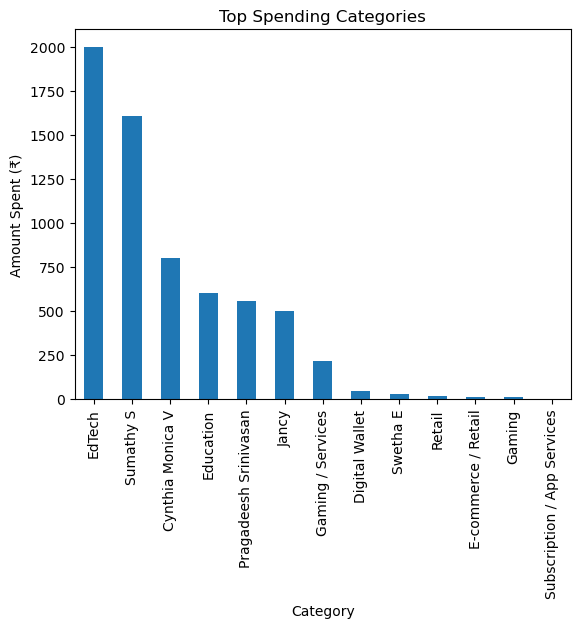

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart of spending by category
top_merchants.plot(kind='bar', title='Top Spending Categories')
plt.ylabel("Amount Spent (₹)")
plt.show()